In [3]:
import numpy as np


def assignement_warmup():
    """
    ## Assignment 1: Basic 2x2 System (Warmup)
    **Difficulty**: ⭐  
    **Time**: 30 minutes  
    **Goal**: Master the fundamentals

    ### Problem
    Solve this system by hand first, then verify with NumPy:
    ```
    2x + 3y = 7
    4x - y = 1
    y = 4x - 1 -> 2x + 3(4x - 1) = 7 -> 2x + 12x - 3 = 7  ->  14x = 10  -> x = 10/14 = 5/7
    y = 4(5/7) - 7/7 = (20 - 7)/ = 13/7

    ```

    ### Implementation Tasks
    ```python
    import numpy as np

    # 1. Set up the coefficient matrix A and vector b
    # 2. Solve using np.linalg.solve()
    # 3. Verify solution by computing A @ x - b (should be ~0)
    # 4. Check determinant and condition number
    # 5. Visualize the lines and intersection point
    ```

    ### Learning Outcomes
    - Understand matrix-vector representation
    - Learn to verify solutions
    - Introduction to condition numbers

    ---
    """
    A = np.array([[2, 3], [4, -1]])
    b = np.array([7, 1])
    x = np.linalg.solve(A, b)
    # 3. Verify solution by computing A @ x - b (should be ~0)
    A @ x - b  # rougly zero
    # 4. Check determinant and condition number
    det = np.linalg.det(A)
    # 4.1 condition number
    np.linalg.cond(A)


In [5]:
A = np.array([[2, 3], [4, -1]])
np.linalg.cond(A)

np.float64(1.4560832005096074)

In [1]:
"""
## Assignment 2: Overdetermined System with Least Squares
**Difficulty**: ⭐⭐  
**Time**: 45 minutes  
**Goal**: Handle more equations than unknowns

### Problem
Fit a line y = mx + b to these noisy data points:
```
Points: (1, 2.1), (2, 3.9), (3, 6.2), (4, 7.8), (5, 10.1)
```

### Implementation Tasks
```python
# 1. Set up overdetermined system Ax = b
#    where A = [[x₁, 1], [x₂, 1], ...] and x = [m, b]
# 2. Solve using np.linalg.lstsq()
# 3. Compare with np.linalg.solve() and observe the error
# 4. Plot original points and fitted line
# 5. Calculate residual sum of squares
```

### Learning Outcomes
- Understand when exact solutions don't exist
- Learn least squares methodology
- Visualize fitting quality
"""
A = np.array([[1, 2.1], [2, 3.9], [3, 6.2], [4, 7.8], [5, 10.1]])
A = np.array([
    [1,1],
    [2,1],
    [3,1],
    [4,1],
    [5,1]
])
# 3.9], [3, 6.2], [4, 7.8], [5, 10.1]])
b = np.array([
    [2.1],
    [3.9],
    [6.2],
    [7.8],
    [10.1]
])
# x = [m, c]

x, residuals, rank, s = np.linalg.lstsq(A, b)
# x_solve = np.linalg.solve(A, b)


# A @ x  approximately b


NameError: name 'np' is not defined

In [27]:
x, residuals, rank, s 

(array([[1.99],
        [0.05]]),
 array([0.107]),
 np.int32(2),
 array([7.69121313, 0.91936964]))

In [29]:
y_predicted = A @ x

In [36]:
residuals_checked = sum(map(np.square, b - y_predicted))
residuals_checked

array([0.107])

Matplotlib is building the font cache; this may take a moment.


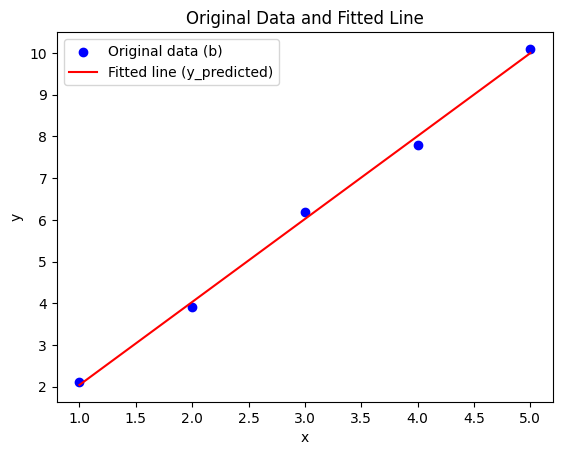

In [32]:
import matplotlib.pyplot as plt

plt.scatter(range(1, 6), b.flatten(), color='blue', label='Original data (b)')
plt.plot(range(1, 6), y_predicted.flatten(), color='red', label='Fitted line (y_predicted)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Original Data and Fitted Line')
plt.show()

In [46]:
"""

## Assignment 3: Homogeneous System (Null Space)
**Difficulty**: ⭐⭐  
**Time**: 1 hour  
**Goal**: Solve Ax = 0 systems

### Problem
Find non-trivial solutions to this homogeneous system:
```
x + 2y + 3z = 0
2x + 4y + 6z = 0
3x + 6y + 9z = 0
```

### Implementation Tasks
```python
# 1. Recognize this is a rank-deficient system
# 2. Use SVD to find the null space
# 3. Verify that A @ x ≈ 0 for your solution
# 4. Find all solutions (parametric form)
# 5. Visualize the solution space (2D plane in 3D)
```

### Learning Outcomes
- Understand rank deficiency
- Learn SVD for null space computation
- Geometric interpretation of solution spaces

"""

'''
x + 2y + 3z = 0
2x + 4y + 6z = 0
3x + 6y + 9z = 0
'''
A = np.array([
    [1, 2, 3],
    [2, 4, 6],
    [3, 6, 9],
])
b = np.array([0, 0, 0])
U,S, Vh = np.linalg.svd(A, full_matrices=True)

In [48]:
U,S, Vh

(array([[-2.67261242e-01,  9.63624112e-01,  2.81388522e-16],
        [-5.34522484e-01, -1.48249863e-01, -8.32050294e-01],
        [-8.01783726e-01, -2.22374795e-01,  5.54700196e-01]]),
 array([1.40000000e+01, 8.49709117e-16, 7.00220105e-32]),
 array([[-0.26726124, -0.53452248, -0.80178373],
        [-0.79918636, -0.34193321,  0.49435093],
        [-0.53839817,  0.77289546, -0.33579758]]))

In [ ]:
U @ np.diag(S) @ Vh # reconstructing the matrix

array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]])

In [63]:
# 2. Use SVD to find the null space
# 3. Verify that A @ x ≈ 0 for your solution
# null space is  a columns of Vh
tolerance_ = 1e-10
null_indices = S < tolerance_

# count how many rows in S are zero
rank = np.sum(S > tolerance_)

nullity = A.shape[1] - rank # how many rows are 0 - 2 in this case

# finding a null space:
x = Vt[rank:, :].T

In [75]:
A @ x[:, 1]

array([1.11022302e-15, 2.22044605e-15, 3.10862447e-15])

In [85]:
from scipy.linalg import null_space
null_space_matrix = null_space(A); null_space_matrix


array([[-0.79918636, -0.53839817],
       [-0.34193321,  0.77289546],
       [ 0.49435093, -0.33579758]])

In [ ]:
A @ res[:, 1], A @ res[:, 0]

array([0., 0., 0.])

In [87]:
null_space_matrix

array([[-0.79918636, -0.53839817],
       [-0.34193321,  0.77289546],
       [ 0.49435093, -0.33579758]])

In [88]:
# 4. Find all solutions (parametric form)
null_space_matrix, x


(array([[-0.79918636, -0.53839817],
        [-0.34193321,  0.77289546],
        [ 0.49435093, -0.33579758]]),
 array([[-0.77821054,  0.40824829],
        [-0.07750397, -0.81649658],
        [ 0.62320261,  0.40824829]]))

In [90]:
A @ null_space_matrix[:, 1], A @ x[:, 1]

(array([0., 0., 0.]), array([1.11022302e-15, 2.22044605e-15, 3.10862447e-15]))

In [98]:
S

array([1.40000000e+01, 8.49709117e-16, 7.00220105e-32])

In [92]:
Vh

array([[-0.26726124, -0.53452248, -0.80178373],
       [-0.79918636, -0.34193321,  0.49435093],
       [-0.53839817,  0.77289546, -0.33579758]])

In [93]:
Vh[rank:, :].T

array([[-0.79918636, -0.53839817],
       [-0.34193321,  0.77289546],
       [ 0.49435093, -0.33579758]])

In [110]:
v1, v2 = x[:, 0], x[:, 1]

t1, t2, t3 = (0, 1, -1.5)

solve = lambda t1, t2: t1 * v1 + t2 * v2

x1 = solve(t1, t2)
x2 = solve(t1, t3)

A @ x1, A @ x2


(array([1.11022302e-15, 2.22044605e-15, 3.10862447e-15]),
 array([-1.33226763e-15, -2.66453526e-15, -3.55271368e-15]))

In [113]:
A @ (v1 * t3), A @ (v1 * t2)

(array([-1.40458403, -2.80916805, -4.21375208]),
 array([0.93638935, 1.8727787 , 2.80916805]))

In [124]:
A @ (null_space_matrix[:, 0] * t2  + null_space_matrix[:, 1] * t3)

array([-4.4408921e-16, -8.8817842e-16,  0.0000000e+00])

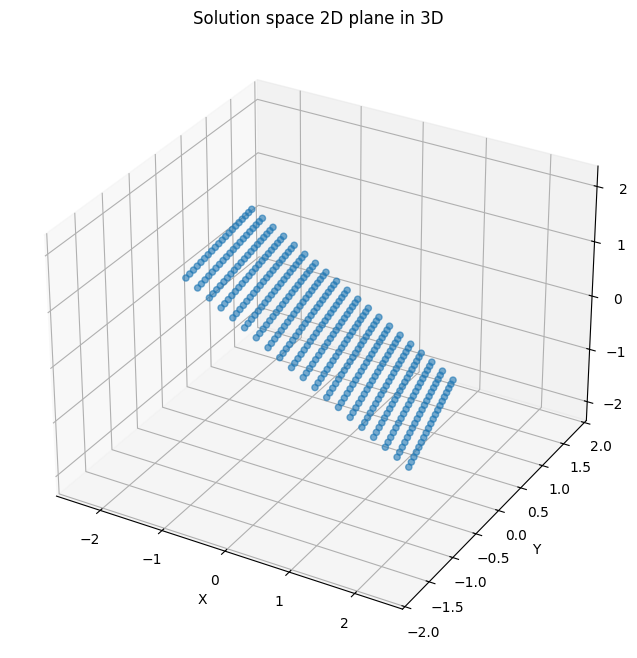

In [129]:
# 5. Visualize the solution space (2D plane in 3D)
from mpl_toolkits.mplot3d import Axes3D

ns1 = x
ns2 = null_space_matrix

t1_range = np.linspace(-2, 2, 20)
t2_range = np.linspace(-2, 2, 20)

T1, T2 = np.meshgrid(t1_range, t2_range)

# generate points on solution plane:  x = t1*v1 + t2*v2
X = T1.flatten()[:, None] * ns1[:, 0] + T2.flatten()[:, None] * ns1[:, 1]

# plot 3D

fig  = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Solution space 2D plane in 3D')
plt.show()

In [127]:
T1

array([[-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
        -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
         0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
         1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ],
       [-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
        -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
         0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
         1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ],
       [-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
        -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
         0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
         1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ],
       [-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
        -0.94736842, -0.73684211, -0.52631579, -

## Visualise rand deficiency

=== Full Rank Matrix (rank = 2) ===
Input vectors:
[[1 0 1 2]
 [0 1 1 3]]
Output vectors:
[[1 0 1 2]
 [0 1 1 3]]
✅ Output spans entire 2D plane

=== Rank Deficient Matrix (rank = 1) ===
Input vectors:
[[1 0 1 2]
 [0 1 1 3]]
Output vectors:
[[ 1  2  3  8]
 [ 2  4  6 16]]
❌ All outputs lie on the line y = 2x (only 1 dimension)


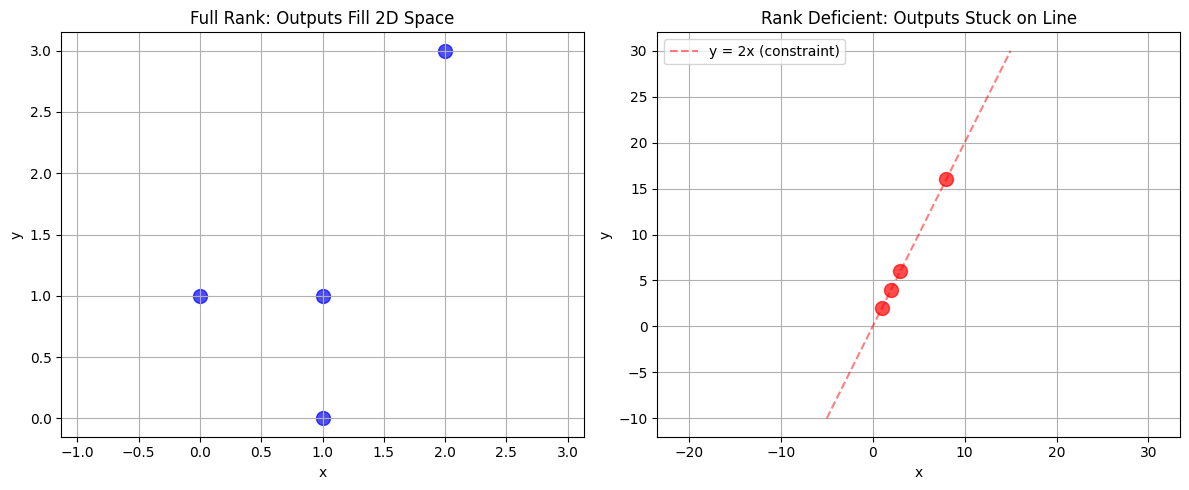

In [130]:
def visualize_rank_deficiency():
    """Show what rank deficiency looks like geometrically"""
    
    # Full rank 2×2 matrix - spans entire 2D plane
    A_full = np.array([[1, 0],
                       [0, 1]])
    
    # Rank deficient 2×2 matrix - only spans a line  
    A_deficient = np.array([[1, 2],
                           [2, 4]])  # Second row = 2 × first row
    
    # Test vectors
    test_vectors = np.array([[1, 0], [0, 1], [1, 1], [2, 3]]).T
    
    print("=== Full Rank Matrix (rank = 2) ===")
    results_full = A_full @ test_vectors
    print(f"Input vectors:\n{test_vectors}")
    print(f"Output vectors:\n{results_full}")
    print("✅ Output spans entire 2D plane")
    
    print("\n=== Rank Deficient Matrix (rank = 1) ===") 
    results_deficient = A_deficient @ test_vectors
    print(f"Input vectors:\n{test_vectors}")
    print(f"Output vectors:\n{results_deficient}")
    print("❌ All outputs lie on the line y = 2x (only 1 dimension)")
    
    # Visualize
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 5))
    
    # Full rank case
    plt.subplot(1, 2, 1)
    plt.scatter(results_full[0], results_full[1], c='blue', s=100, alpha=0.7)
    plt.grid(True)
    plt.axis('equal')
    plt.title('Full Rank: Outputs Fill 2D Space')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Rank deficient case  
    plt.subplot(1, 2, 2)
    plt.scatter(results_deficient[0], results_deficient[1], c='red', s=100, alpha=0.7)
    x_line = np.linspace(-5, 15, 100)
    plt.plot(x_line, 2*x_line, 'r--', alpha=0.5, label='y = 2x (constraint)')
    plt.grid(True)
    plt.axis('equal')
    plt.title('Rank Deficient: Outputs Stuck on Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

visualize_rank_deficiency()


## Assignment 4: 2D Point Transformation
**Difficulty**: ⭐⭐  
**Time**: 1 hour  
**Goal**: Apply to basic computer vision

### Problem
You have 4 corners of a square and their transformed positions:
```
Original: (0,0), (1,0), (1,1), (0,1)
Transformed: (1,1), (2,1), (2,2), (1,2)
```

Find the 2x2 transformation matrix + translation vector.

### Implementation Tasks
```python
# 1. Set up system for affine transformation: y = Ax + t
# 2. Separate into rotation/scaling (A) and translation (t)
# 3. Solve for transformation parameters
# 4. Apply transformation to new points
# 5. Visualize original and transformed shapes
```

### Learning Outcomes
- Connect linear algebra to geometric transformations
- Understand affine transformations
- Separate different transformation components


In [140]:
A = np.array([(0,0), (1,0), (1,1), (0,1)])
At = np.array([(1,1), (2,1), (2,2), (1,2)])
t = np.mean(At - A, axis=0)
M = np.eye(2)

(M @ A.T).T + t

array([[1., 1.],
       [2., 1.],
       [2., 2.],
       [1., 2.]])

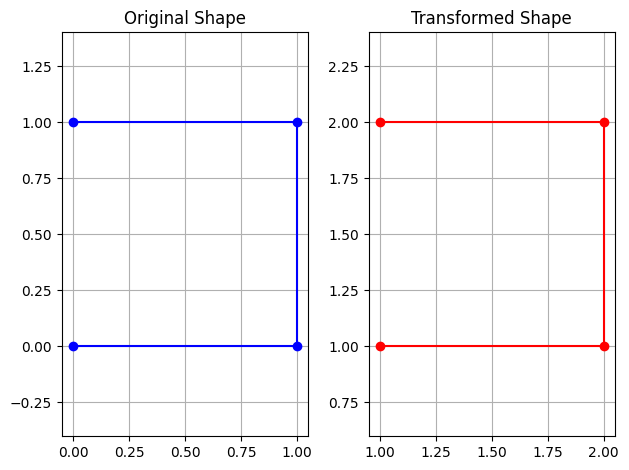

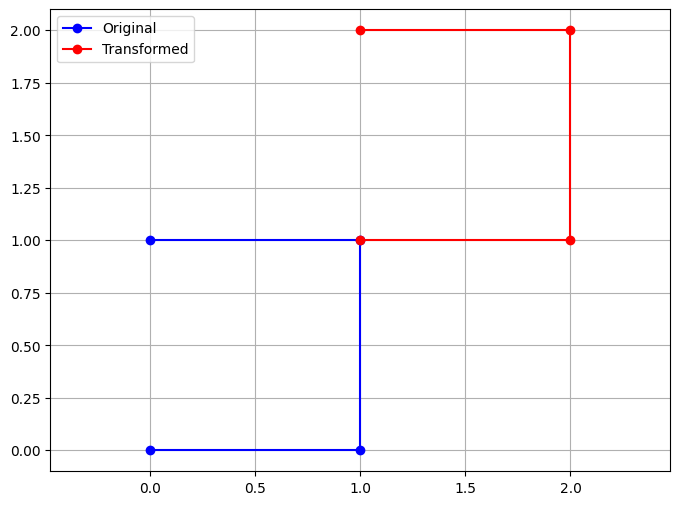

In [143]:
plt.subplot(1, 2, 1)
plt.plot(A[:, 0], A[:, 1], 'bo-', label='Original')
plt.title('Original Shape')
plt.grid(True)
plt.axis('equal')


# Plot transformed shape
plt.subplot(1, 2, 2)
plt.plot(At[:, 0], At[:, 1], 'ro-', label='Transformed')
plt.title('Transformed Shape')
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

# Or both on same plot:
plt.figure(figsize=(8, 6))
plt.plot(A[:, 0], A[:, 1], 'bo-', label='Original')
plt.plot(At[:, 0], At[:, 1], 'ro-', label='Transformed')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [ ]:
"""

## Assignment 5: Simple Camera Model
**Difficulty**: ⭐⭐⭐  
**Time**: 1.5 hours  
**Goal**: Basic perspective projection

### Problem
A simple pinhole camera projects 3D points to 2D:
```
3D points: (1,1,2), (2,1,3), (1,2,4), (2,2,5)
2D projections: (100,100), (133,66), (50,100), (80,80)
```

Find the camera matrix P (3x4) using the equation: s * [u,v,1]ᵀ = P * [X,Y,Z,1]ᵀ

### Implementation Tasks
```python
# 1. Set up the system using Direct Linear Transform (DLT)
# 2. Handle the scale factor s by cross products
# 3. Solve the homogeneous system Ap = 0
# 4. Reshape solution back to 3x4 matrix
# 5. Test projection on new 3D points
```

### Learning Outcomes
- Understand perspective projection mathematics
- Learn Direct Linear Transform method
- Handle homogeneous coordinates

"""